# Protest for Happiness Analysis 
    * Fereshteh Aghaei
    * Jen Mahon
    * Julia Squeri
    * John Shuford
#### Final Observation and Analysis: 
* -
* -
* -

In [112]:
# Magic Function for graphs/displays
%matplotlib inline

In [113]:
# Importing our Dependencies
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import requests
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
#from config import api_key
from pprint import pprint


# Hide warning messages in notebook
import warnings
warnings.filterwarnings("ignore")

## Load & Read CSV files

In [114]:
Happiness_Data = pd.read_csv("Happiness_Data/clean_combined_happiness.csv")
Happiness_Data.head()

,Country,Region,Total Happiness Score,Total Freedom Rate,2015 Happiness Rank,2015 Happiness Score,2015 Economy,2015 Family,2015 Health,2015 Freedom,...,2018 Generosity,2018 Dystopia Residual,2019 Happiness Rank,2019 Happiness Score,2019 Economy,2019 Family,2019 Health,2019 Freedom,2019 Generosity,2019 Dystopia Residual
0,Switzerland,Western Europe,37.557,3.103211,1.0,7.587,1.39651,1.34951,0.94143,0.66557,...,0.256,0.357,6.0,7.480,1.452,1.526,1.052,0.572,0.263,0.343
1,Iceland,Western Europe,37.555,3.090173,2.0,7.561,1.30232,1.40223,0.94784,0.62877,...,0.353,0.138,4.0,7.494,1.380,1.624,1.026,0.591,0.354,0.118
2,Denmark,Western Europe,37.730,3.129797,3.0,7.527,1.32548,1.36058,0.87464,0.64938,...,0.284,0.408,2.0,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,Western Europe,37.705,3.190243,4.0,7.522,1.45900,1.33095,0.88521,0.66973,...,0.286,0.340,3.0,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Canada,North America,36.753,3.054771,5.0,7.427,1.32629,1.32261,0.90563,0.63297,...,0.321,0.291,9.0,7.278,1.365,1.505,1.039,0.584,0.285,0.308


In [115]:
Protest_Data = pd.read_csv("Mass_Movement_Data/movement_data.csv")
Protest_Data.head()

,country,year,start,end,protest_duration,region,location,participants_category,protesterdemand1,stateresponse1,total protests
0,Colombia,2016,2016-10-05,2016-10-17,12 days,South America,"Plaza de Bol var & Casa de Nari o, Bogot",>10000,"political behavior, process",ignore,6
1,Colombia,2017,2017-01-22,2017-01-22,0 days,South America,Bogot,100-999,"political behavior, process",crowd dispersal,6
2,Colombia,2017,2017-04-01,2017-04-15,14 days,South America,Bogota,1000-1999,"political behavior, process",ignore,6
3,Colombia,2017,2017-10-05,2017-10-05,0 days,South America,Tumaco,50-99,land farm issue,crowd dispersal,6
4,Colombia,2018,2018-01-26,2018-01-26,0 days,South America,Bogota,2000-4999,social restrictions,crowd dispersal,6


### Count of protests
* How many total protests occurred per region? How does this differ between the regions?
        Bar chart of #
        ANOVA to find differences between 3 group means
        Can show in boxplot
* Heat map to show protests across regions and what countries have the most


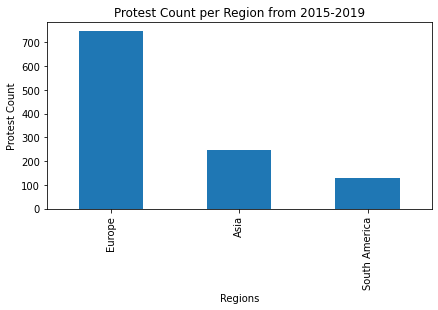

In [116]:
#Get count of how many protests per region
regions = Protest_Data['region'].value_counts()

regions.plot(kind='bar')
plt.tight_layout()
plt.xlabel("Regions")
plt.ylabel("Protest Count")
plt.title("Protest Count per Region from 2015-2019")
plt.show()

In [117]:
europe = Protest_Data.loc[Protest_Data['region']== 'Europe']
europe_count = europe['country'].value_counts()
europe_count

Germany            117
France             110
United Kingdom      80
Romania             52
Spain               47
Ireland             34
Greece              34
Russia              32
Italy               26
Poland              22
Armenia             22
Moldova             21
Hungary             14
Slovak Republic     14
Albania             13
Macedonia           12
Bosnia              11
Belgium             10
Belarus              9
Czech Republic       8
Croatia              7
Georgia              7
Serbia               7
Latvia               6
Kosovo               6
Sweden               6
Bulgaria             5
Portugal             5
Finland              5
Cyprus               5
Name: country, dtype: int64

<AxesSubplot:>

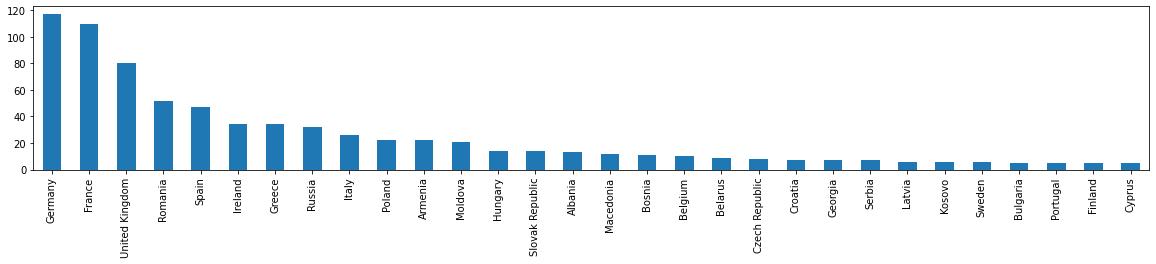

In [118]:
europe_count.plot(kind='bar', figsize=(20,3))

### Size of protest
* How many people attended the protests per region/what was the average protest size?
        * Bar chart of #
        * ANOVA to find differences between 3 group means
                * Can show in boxplot


In [119]:
#Creates bins for protest size
bins = [0,1,2,3,4,5]

group_names = ["50-99", "100-999", "1000-1999","2000-4999","5000-10000", ">10000"]

In [147]:
south_america_count = Protest_Data.loc[Protest_Data['region'] == 'South America', 'participants_category'].value_counts()
europe_count = Protest_Data.loc[Protest_Data['region'] == 'Europe', 'participants_category'].value_counts()
asia_count = Protest_Data.loc[Protest_Data['region'] == 'Asia', 'participants_category'].value_counts()

In [160]:
protest_size_df = pd.DataFrame({"South America": south_america_count,
                               "Europe": europe_count,
                               "Asia": asia_count})
protest_size_df

,South America,Europe,Asia
100-999,32,153,91
1000-1999,4,28,10
2000-4999,24,157,48
50-99,23,193,51
5000-10000,12,71,16
>10000,32,145,31


In [149]:
protest_size_df = protest_size_df.reset_index()
#protest_size_df

# Reset index smallest to largest
protest_size_df2 = protest_size_df.reindex([3,0,1,2,4,5])
protest_df3 = protest_size_df2.set_index('index')
protest_df3

,South America,Europe,Asia
index,,,
50-99,23,193,51
100-999,32,153,91
1000-1999,4,28,10
2000-4999,24,157,48
5000-10000,12,71,16
>10000,32,145,31


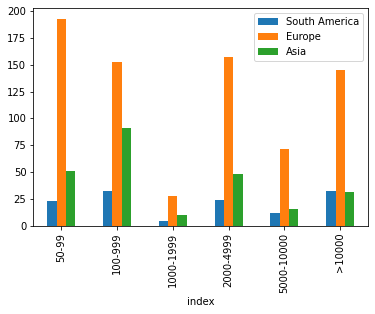

In [124]:
multi_plot = protest_df3.plot(kind="bar")

### Protest type
* What was the reason for the protest? (I.e, political behavior, police brutality, political process, etc) How does this differ between the regions?
        * Bar chart of #
        * ANOVA to find differences between 3 group means
                * Can show in boxplot
                * Can expand on these analyses to look at the protest breakdown per region (i.e, protests in europe)


In [125]:
Protest_Data.head()

,country,year,start,end,protest_duration,region,location,participants_category,protesterdemand1,stateresponse1,total protests
0,Colombia,2016,2016-10-05,2016-10-17,12 days,South America,"Plaza de Bol var & Casa de Nari o, Bogot",>10000,"political behavior, process",ignore,6
1,Colombia,2017,2017-01-22,2017-01-22,0 days,South America,Bogot,100-999,"political behavior, process",crowd dispersal,6
2,Colombia,2017,2017-04-01,2017-04-15,14 days,South America,Bogota,1000-1999,"political behavior, process",ignore,6
3,Colombia,2017,2017-10-05,2017-10-05,0 days,South America,Tumaco,50-99,land farm issue,crowd dispersal,6
4,Colombia,2018,2018-01-26,2018-01-26,0 days,South America,Bogota,2000-4999,social restrictions,crowd dispersal,6


In [126]:
south_america_reason = Protest_Data.loc[Protest_Data['region'] == 'South America', 'protesterdemand1'].value_counts()
europe_reason = Protest_Data.loc[Protest_Data['region'] == 'Europe', 'protesterdemand1'].value_counts()
asia_reason = Protest_Data.loc[Protest_Data['region'] == 'Asia', 'protesterdemand1'].value_counts()

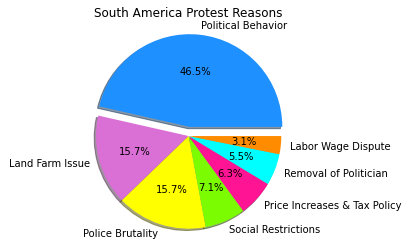

In [127]:
protest_reasons = ["Political Behavior", 
                   "Land Farm Issue", 
                   "Police Brutality", 
                   "Social Restrictions", 
                   "Price Increases & Tax Policy", 
                   "Removal of Politician", 
                   "Labor Wage Dispute"]

colors = ["dodgerblue","orchid","yellow","lawngreen","deeppink","cyan","darkorange"]

explode = (0.1,0,0,0,0,0,0)

south_america_reason.plot(kind='pie', 
               labels= protest_reasons, 
               colors=colors, 
               autopct="%1.1f%%", 
               ylabel= " ", 
               explode=explode, 
               shadow=True)


plt.title("South America Protest Reasons")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/south_america_pie.png")
plt.show()


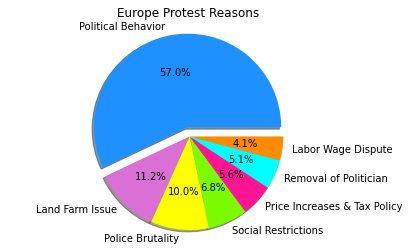

In [128]:
protest_reasons = ["Political Behavior", 
                   "Land Farm Issue", 
                   "Police Brutality", 
                   "Social Restrictions", 
                   "Price Increases & Tax Policy", 
                   "Removal of Politician", 
                   "Labor Wage Dispute"]

colors = ["dodgerblue","orchid","yellow","lawngreen","deeppink","cyan","darkorange"]

explode = (0.1,0,0,0,0,0,0)

europe_reason.plot(kind='pie', 
               labels= protest_reasons, 
               colors=colors, 
               autopct="%1.1f%%", 
               ylabel= " ", 
               explode=explode, 
               shadow=True)


plt.title("Europe Protest Reasons")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/europe_pie.png")

plt.show()


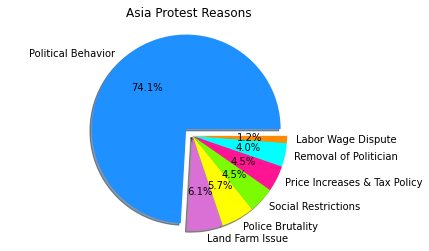

In [129]:
protest_reasons = ["Political Behavior", 
                   "Land Farm Issue", 
                   "Police Brutality", 
                   "Social Restrictions", 
                   "Price Increases & Tax Policy", 
                   "Removal of Politician", 
                   "Labor Wage Dispute"]

colors = ["dodgerblue","orchid","yellow","lawngreen","deeppink","cyan","darkorange"]

explode = (0.1,0,0,0,0,0,0)

asia_reason.plot(kind='pie', 
               labels= protest_reasons, 
               colors=colors, 
               autopct="%1.1f%%", 
               ylabel= " ", 
               explode=explode, 
               shadow=True)

plt.title("Asia Protest Reasons")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/asia_pie.png")

plt.show()


### Happiness score
* From World Happiness Report
        * Bar chart or box plot to show difference of happiness score between regions being compared
* Do the number/frequency of protests in a country affect how happy the country is?
        * Line chart happiness rating/protest numbers over the years
        * Scatter plot


In [150]:
Happiness_Data = Happiness_Data.rename(columns={"Country":"country"})
Happiness_Data.head()

,country,Region,Total Happiness Score,Total Freedom Rate,2015 Happiness Rank,2015 Happiness Score,2015 Economy,2015 Family,2015 Health,2015 Freedom,...,2018 Generosity,2018 Dystopia Residual,2019 Happiness Rank,2019 Happiness Score,2019 Economy,2019 Family,2019 Health,2019 Freedom,2019 Generosity,2019 Dystopia Residual
0,Switzerland,Western Europe,37.557,3.103211,1.0,7.587,1.39651,1.34951,0.94143,0.66557,...,0.256,0.357,6.0,7.480,1.452,1.526,1.052,0.572,0.263,0.343
1,Iceland,Western Europe,37.555,3.090173,2.0,7.561,1.30232,1.40223,0.94784,0.62877,...,0.353,0.138,4.0,7.494,1.380,1.624,1.026,0.591,0.354,0.118
2,Denmark,Western Europe,37.730,3.129797,3.0,7.527,1.32548,1.36058,0.87464,0.64938,...,0.284,0.408,2.0,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,Western Europe,37.705,3.190243,4.0,7.522,1.45900,1.33095,0.88521,0.66973,...,0.286,0.340,3.0,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Canada,North America,36.753,3.054771,5.0,7.427,1.32629,1.32261,0.90563,0.63297,...,0.321,0.291,9.0,7.278,1.365,1.505,1.039,0.584,0.285,0.308


### Reshape Happiness Dataframe

In [182]:
melt_happiness = pd.melt(Happiness_Data,
                 id_vars=['country',
                          'Region',
                          'Total Happiness Score',
                          'Total Freedom Rate'],
                  value_vars=['2015 Happiness Rank',
                          '2015 Happiness Score',
                          '2015 Economy',
                          '2015 Family',
                          '2015 Health',
                          '2015 Freedom',
                          '2015 Corruption/Trust',
                          '2015 Generosity',
                          '2015 Dystopia Residual',
                          '2016 Happiness Rank',
                          '2016 Happiness Score',
                          '2016 Economy',
                          '2016 Family',
                          '2016 Health',
                          '2016 Freedom',
                          '2016 Corruption/Trust',
                          '2016 Generosity',
                          '2016 Dystopia Residual',
                          '2017 Happiness Rank',
                          '2017 Happiness Score',
                          '2017 Economy',
                          '2017 Family',
                          '2017 Health',
                          '2017 Freedom',
                          '2017 Corruption/Trust',
                          '2017 Generosity',
                          '2017 Dystopia Residual',
                          '2018 Happiness Rank',
                          '2018 Happiness Score',
                          '2018 Economy',
                          '2018 Family',
                          '2018 Health',
                          '2018 Freedom',
                          '2018 Generosity',
                          '2018 Dystopia Residual',
                          '2019 Happiness Rank',
                          '2019 Happiness Score',
                          '2019 Economy',
                          '2019 Family',
                          '2019 Health',
                          '2019 Freedom',
                          '2019 Generosity',
                          '2019 Dystopia Residual'],
                  var_name='Years')

melt_happiness = melt_happiness.rename(columns={"value":"Scores"})

col_name="Years"
first_col = melt_happiness.pop(col_name)
melt_happiness.insert(2, col_name, first_col)

col_name="Scores"
sec_col = melt_happiness.pop(col_name)
melt_happiness.insert(3, col_name, sec_col)

melt_happiness.head()

,country,Region,Years,Scores,Total Happiness Score,Total Freedom Rate
0,Switzerland,Western Europe,2015 Happiness Rank,1.0,37.557,3.103211
1,Iceland,Western Europe,2015 Happiness Rank,2.0,37.555,3.090173
2,Denmark,Western Europe,2015 Happiness Rank,3.0,37.730,3.129797
3,Norway,Western Europe,2015 Happiness Rank,4.0,37.705,3.190243
4,Canada,North America,2015 Happiness Rank,5.0,36.753,3.054771


In [183]:
germany_happiness = melt_happiness.loc[melt_happiness['country']=='Germany']

germany_protest = Protest_Data.loc[Protest_Data['country']=='Germany']

germany_happiness.head()

,country,Region,Years,Scores,Total Happiness Score,Total Freedom Rate
25,Germany,Western Europe,2015 Happiness Rank,26.00000,34.645,2.792941
195,Germany,Western Europe,2015 Happiness Score,6.75000,34.645,2.792941
365,Germany,Western Europe,2015 Economy,1.32792,34.645,2.792941
535,Germany,Western Europe,2015 Family,1.29937,34.645,2.792941
705,Germany,Western Europe,2015 Health,0.89186,34.645,2.792941


In [133]:
# germany_happiness_df = germany_happiness.T
# germany_happiness_df

In [134]:
# germany_happiness_df = germany_happiness_df.reset_index()
# germany_happiness_df
# #Rename index year, for x in DF 
# for x in germany_happiness_df:
#     x.split()[0]
#     print(x)

# for index,row in germany_happiness_df.iterrows():
    

### Not sure if should merge or not?

In [154]:
#Countries and happiness score
happiness_protest_df = pd.merge(Protest_Data, melt_happiness, on='country', how='left')
happiness_protest_df.head()

,country,year,start,end,protest_duration,region,location,participants_category,protesterdemand1,stateresponse1,total protests,Region,Total Happiness Score,Total Freedom Rate,Years,Scores
0,Colombia,2016,2016-10-05,2016-10-17,12 days,South America,"Plaza de Bol var & Casa de Nari o, Bogot",>10000,"political behavior, process",ignore,6,Latin America and Caribbean,31.7,2.460497,2015 Happiness Rank,33.00000
1,Colombia,2016,2016-10-05,2016-10-17,12 days,South America,"Plaza de Bol var & Casa de Nari o, Bogot",>10000,"political behavior, process",ignore,6,Latin America and Caribbean,31.7,2.460497,2015 Happiness Score,6.47700
2,Colombia,2016,2016-10-05,2016-10-17,12 days,South America,"Plaza de Bol var & Casa de Nari o, Bogot",>10000,"political behavior, process",ignore,6,Latin America and Caribbean,31.7,2.460497,2015 Economy,0.91861
3,Colombia,2016,2016-10-05,2016-10-17,12 days,South America,"Plaza de Bol var & Casa de Nari o, Bogot",>10000,"political behavior, process",ignore,6,Latin America and Caribbean,31.7,2.460497,2015 Family,1.24018
4,Colombia,2016,2016-10-05,2016-10-17,12 days,South America,"Plaza de Bol var & Casa de Nari o, Bogot",>10000,"political behavior, process",ignore,6,Latin America and Caribbean,31.7,2.460497,2015 Health,0.69077


### Should we change Years data type from object to int? This column values are ex '2015 Happiness Score'

In [156]:
happiness_protest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47153 entries, 0 to 47152
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                47153 non-null  object 
 1   year                   47153 non-null  int64  
 2   start                  47153 non-null  object 
 3   end                    47153 non-null  object 
 4   protest_duration       47153 non-null  object 
 5   region                 47153 non-null  object 
 6   location               47153 non-null  object 
 7   participants_category  47153 non-null  object 
 8   protesterdemand1       47153 non-null  object 
 9   stateresponse1         47153 non-null  object 
 10  total protests         47153 non-null  int64  
 11  Region                 47128 non-null  object 
 12  Total Happiness Score  47128 non-null  float64
 13  Total Freedom Rate     47128 non-null  float64
 14  Years                  47128 non-null  object 
 15  Sc

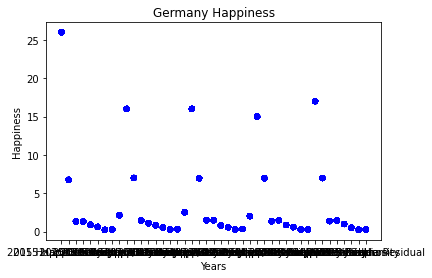

In [199]:
# Create a dataframe for Germany
germany_data = happiness_protest_df.loc[happiness_protest_df['country'] == 'Germany']

# Create a title, x label, and y label for our chart
plt.title("Germany Happiness")
x_values = germany_data['Years']
y_values = germany_data['Scores']
plt.scatter(x_values,y_values, alpha = 1, marker = 'o', facecolors = 'blue', edgecolors ='none', linewidths=20)
plt.xlabel("Years")
plt.ylabel('Happiness')

# Save the figure
#plt.savefig("Images/Scatterplot.png")

# Display Graph
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

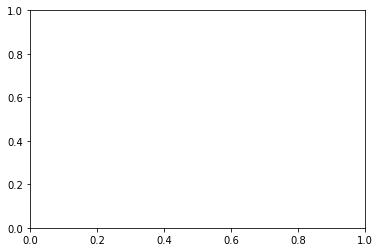

In [201]:
germany_df = happiness_protest_df.loc[happiness_protest_df['country']=='Germany']



ger_happiness = happiness_protest_df.loc[happiness_protest_df,["2015 Happiness Score", "2016 Happiness Score", 
                                                  "2017 Happiness Score", "2018 Happiness Score", "2019 Happiness Score"]]


plt.scatter(germany_df, ger_happiness)
#plt.show()
#y_axis = germany_df.loc[germany_df['Total Happiness Score']]

#plt.scatter(germany_df, y_axis)

### Freedom score/index 
* From World Happiness Report
* Does a country's freedom score correlate with the amount of protests occurring?
        * Scatter
        * Could do per region, or for one specific region/country 
            * For ex, if we see one country has a low freedom score and a low number of protests, could be more 
              meaningful to just show that countries data (does that mean the protests are suppressed? Does that mean 
              people feel like they cant protest?) 


### Perceptions of corruption/government trust
* From World Happiness Report
* Does a country's perception of corruption/trust of government  correlate with the amount of protests occurring? Does it correlate with the type of protests occurring? (i.e, does a country with low trust in its government have a greater number of anti-government protests?)
        * Scatter
        * Could do per region, or for one specific region/country 
            * For ex, if we see one country has a low trust number and a high number of protests, could be more meaningful 
               to just show that countries data (Do we see a relationship where low trust in government leads to a greater 
               number of anti-gov’t/anti-corruption protests?)
